In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('OpenAlex_clean4.csv')
pd.set_option('display.max_columns', None)
df

C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\3468574542.py:1: DtypeWarning: Columns (26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('OpenAlex_clean4.csv')


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,doi,title,publication_year,language,type,countries_distinct_count,institutions_distinct_count,fwci,primary_location.source.display_name,primary_location.source.type,primary_topic.display_name,primary_topic.subfield.display_name,primary_topic.field.display_name,primary_topic.domain.display_name,authorships.author_position,authorships.institutions,authorships.countries,authorships.author.display_name,authorships.raw_affiliation_strings,topics.display_name,topics.subfield.display_name,topics.domain.display_name,keywords.display_name,funders.id,funders.display_name,funders_count,funders_bin,domain_health_sciences,domain_life_sciences,domain_physical_sciences,domain_social_sciences,field_,field_accounting,field_acoustics_and_ultrasonics,field_aerospace_engineering,field_aging,field_agronomy_and_crop_science,field_algebra_and_number_theory,field_analytical_chemistry,field_anatomy,field_anesthesiology_and_pain_medicine,field_animal_science_and_zoology,field_anthropology,field_applied_mathematics,field_applied_microbiology_and_biotechnology,field_applied_psychology,field_aquatic_science,field_archeology,field_architecture,field_artificial_intelligence,field_astronomy_and_astrophysics,field_atmospheric_science,field_atomic_and_molecular_physics_and_optics,field_automotive_engineering,field_behavioral_neuroscience,field_biochemistry,field_bioengineering,field_biological_psychiatry,field_biomaterials,field_biomedical_engineering,field_biophysics,field_biotechnology,field_building_and_construction,field_business_and_international_management,field_cancer_research,field_cardiology_and_cardiovascular_medicine,field_catalysis,field_cell_biology,field_cellular_and_molecular_neuroscience,field_ceramics_and_composites,field_chemical_health_and_safety,field_civil_and_structural_engineering,field_classics,field_clinical_biochemistry,field_clinical_psychology,field_cognitive_neuroscience,field_communication,field_complementary_and_manual_therapy,field_complementary_and_alternative_medicine,field_computational_mathematics,field_computational_mechanics,field_computational_theory_and_mathematics,field_computer_graphics_and_computer-aided_design,field_computer_networks_and_communications,field_computer_science_applications,field_computer_vision_and_pattern_recognition,field_condensed_matter_physics,field_conservation,field_control_and_systems_engineering,field_critical_care_and_intensive_care_medicine,field_cultural_studies,field_demography,field_dermatology,field_development,field_developmental_biology,field_developmental_neuroscience,field_developmental_and_educational_psychology,field_discrete_mathematics_and_combinatorics,field_earth-surface_processes,field_ecological_modeling,field_ecology,field_ecology_evolution_behavior_and_systematics,field_economics_and_econometrics,field_education,field_electrical_and_electronic_engineering,field_electrochemistry,field_electronic_optical_and_magnetic_materials,field_emergency_medical_services,field_emergency_medicine,field_endocrine_and_autonomic_systems,field_endocrinology,field_endocrinology_diabetes_and_metabolism,field_energy_engineering_and_power_technology,field_environmental_chemistry,field_environmental_engineering,field_epidemiology,field_equine,field_experimental_and_cognitive_psychology,field_family_practice,field_filtration_and_separation,field_finance,field_fluid_flow_and_transfer_processes,field_food_science,field_forestry,field_fuel_technology,field_gastroenterology,field_gender_studies,field_general_agricultural_and_biological_sciences,field_general_arts_and_humanities,field_general_decision_sciences,field_general_dentistry,field_general_economics_econometrics_and_finance,field_general_energy,field_general_engineering,field_general_health_professions,field_general_materials_science,field_general_psychology,field_general_social_sciences,field_genetics,field_geochemistry_and_petrology,field_geography_planning_and_development,field_geology,field_geometry_a

## Visualisation des données 

In [3]:
# Harmoniser le thème
money_green = ["#144a3a", "#146b45", "#1f8f5a", "#38b46b", "#7bd389"]

sns.set_theme(
    context="notebook",
    style="darkgrid",
    palette=sns.color_palette(money_green),
    font="serif"
)


In [4]:
def plot_hist_fwci_panel(df: pd.DataFrame, col="fwci", bins=40):
    x = pd.to_numeric(df[col], errors="coerce").dropna()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

    # Plot normal
    ax1.hist(x, 
             bins=bins,         
             edgecolor="black", 
             linewidth=0.6,  )
    ax1.set_title("FWCI")
    ax1.set_xlabel(col)
    ax1.set_ylabel("Nombre d'articles")

    # Plot en log (sur l'axe Y)
    ax2.hist(x,
             bins=bins, 
             log=True,         
             edgecolor="black",  
             linewidth=0.6,  )
    ax2.set_title("FWCI (log)")
    ax2.set_xlabel(col)
    ax2.set_ylabel("Nombre d'articles (log)")

    fig.suptitle("Influence de l'article (FWCI)", fontsize=14)

    plt.tight_layout()
    plt.show()


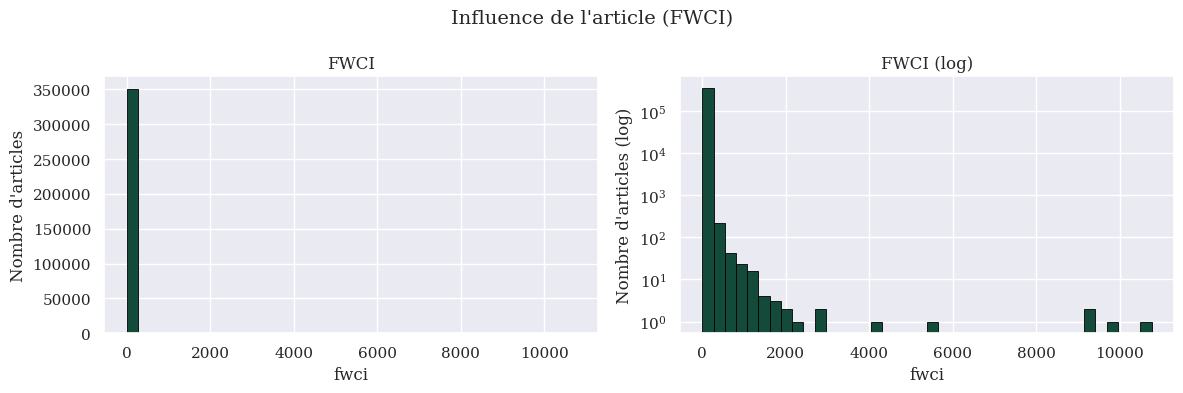

In [5]:
# FWCI (distribution)
plot_hist_fwci_panel(df, col="fwci", bins=40)

In [6]:
def plot_publication_year(df: pd.DataFrame, col="publication_year"):
    d = pd.to_datetime(df[col], errors="coerce")
    years = d.dt.year.dropna().astype(int)

    if years.empty:
        print("Aucune date valide dans", col)
        return

    # Bins alignés sur des années entières (barres nettes, pas d'effets de bord)
    y_min, y_max = years.min(), years.max()
    bins = np.arange(y_min - 0.5, y_max + 1.5, 1)

    fig, ax = plt.subplots(figsize=(10, 4))

    ax.hist(
        years,
        bins=bins,
        edgecolor="black",   # contour des barres
        linewidth=0.6,   
    )

    ax.set_title("Publications par année")
    ax.set_xlabel("Année")
    ax.set_ylabel("Nombre d'articles")

    # Ticks lisibles 
    n_years = y_max - y_min + 1
    step = 1 if n_years <= 15 else 2 if n_years <= 30 else 5
    ax.set_xticks(np.arange(y_min, y_max + 1, step))
    ax.tick_params(axis="x")

    plt.tight_layout()
    plt.show()


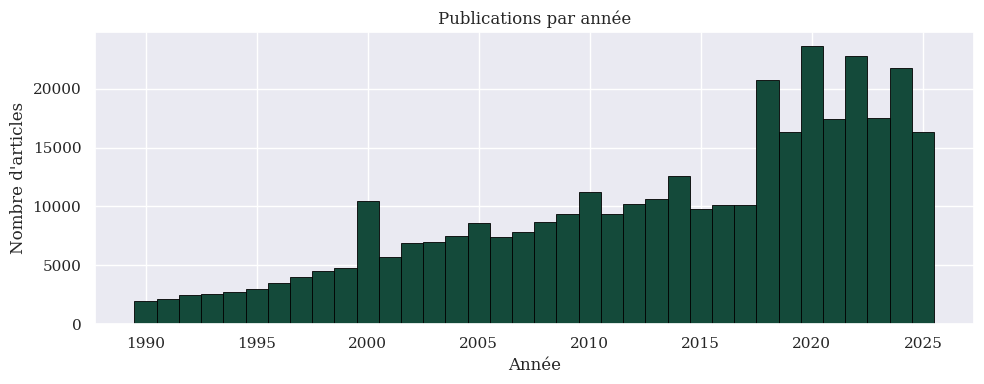

In [7]:
# publication_year (datetime -> année -> série temporelle)
plot_publication_year(df, col="publication_year")

In [8]:
def plot_funders_bin(df: pd.DataFrame): 
    s = df["funders_bin"] 
    counts = s.value_counts().reindex([0, 1], fill_value=0) 
    
    fig, ax = plt.subplots(figsize=(7, 4)) 
    ax.bar(["0", "1"], counts.values, edgecolor="black", linewidth=0.8, width=0.6) 
    ax.set_title("Nombres d'articles avec/sans financement") 
    ax.set_xlabel("Financement (0 = non, 1 = oui)") 
    ax.set_ylabel("Nombre d'articles") 
    plt.tight_layout() 
    plt.show()

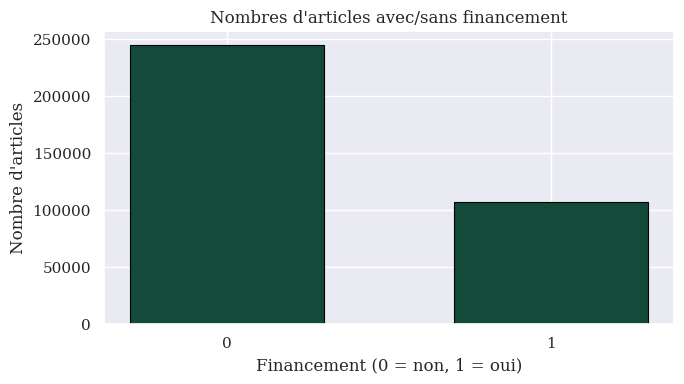

In [9]:
plot_funders_bin(df)

In [10]:
def plot_funders_count(
    df: pd.DataFrame,
    col: str = "funders_count",
    tick_step: int = 10,     # graduations constantes (0,5,10,...)
    max_x: int | None = None  # optionnel : tronquer l'axe X (ex: 80) si très longue traîne
):
    # ---- nettoyage
    fc = pd.to_numeric(df[col], errors="coerce").dropna().astype(int)
    fc = fc[fc >= 0]

    # ---- count plot (distribution discrète)
    counts = fc.value_counts().sort_index()

    # Option: tronquer X pour garder un plot lisible tout en restant "distribution classique"
    if max_x is not None:
        counts = counts[counts.index <= max_x]

    x = counts.index.to_numpy().astype(int)
    y = counts.values

    if len(x) == 0:
        print(f"Aucune donnée valide dans {col}")
        return

    # ---- ticks réguliers et constants
    x_max = int(x.max())
    tick_step = max(1, int(tick_step))
    ticks = np.arange(0, x_max + 1, tick_step)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 4), sharex=True)

    # -----------------------
    # (1) Distribution classique
    # -----------------------
    ax1.bar(x, y, edgecolor="black", linewidth=0.6, width=0.95)
    ax1.set_title("Distribution linéaire", fontsize=13)
    ax1.set_xlabel("Nombre de financeurs")
    ax1.set_ylabel("Nombre d'articles")
    ax1.set_xticks(ticks)

    # -----------------------
    # (2) Distribution log
    # -----------------------
    ax2.bar(x, y, edgecolor="black", linewidth=0.4, width=0.95)
    ax2.set_yscale("log")
    ax2.set_title("Distribution logarithmique", fontsize=13)
    ax2.set_xlabel("Nombre de financeurs")
    ax2.set_ylabel("Nombre d'articles (log)")
    ax2.set_xticks(ticks)

    fig.suptitle("Nombre de financeurs par article", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.92])
    plt.show()


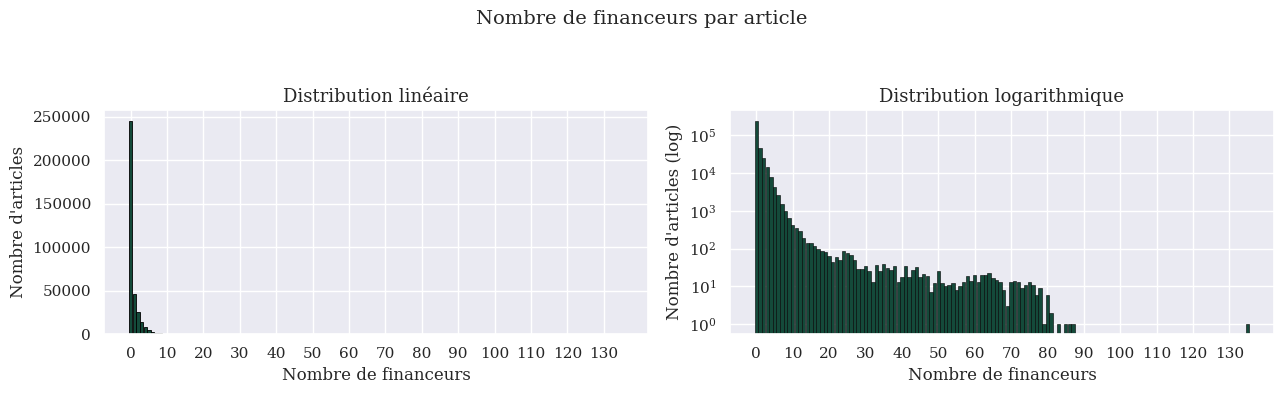

In [11]:
# funders
plot_funders_count(df)

In [12]:
# DOMAINS : occurrences par domaine (barres verticales)
def plot_domains_occurrences(df: pd.DataFrame):
    domain_cols = [
        "domain_health_sciences",
        "domain_life_sciences",
        "domain_physical_sciences",
        "domain_social_sciences",
    ]

    
    domain_labels = [
        'Health Sciences',
        'Life Sciences',
        'Physical Sciences',
        'Social Sciences'
    ]

    domain_cols = [c for c in domain_cols if c in df.columns]
    if not domain_cols:
        raise ValueError("Aucune colonne domain_* trouvée dans le DataFrame.")

    data = pd.DataFrame({c: df[c] for c in domain_cols})
    counts = data.sum(axis=0).sort_values(ascending=False)

    fig, ax = plt.subplots(figsize=(9, 4))
    ax.bar(counts.index, counts.values, edgecolor="black", linewidth=0.6, width=0.7)
    ax.set_title("Occurrences par domaine", fontsize=13)
    ax.set_xlabel("Domaine")
    ax.set_ylabel("Nombre d'articles")
    ax.tick_params(axis="x")
    ax.set_xticklabels(domain_labels)
    plt.tight_layout()
    plt.show()


# DOMAINS : distribution du nombre de domaines par article
def plot_domains_count_per_article(df: pd.DataFrame):
    domain_cols = [
        "domain_health_sciences",
        "domain_life_sciences",
        "domain_physical_sciences",
        "domain_social_sciences",
    ]
    
    domain_cols = [c for c in domain_cols if c in df.columns]
    if not domain_cols:
        raise ValueError("Aucune colonne domain_* trouvée dans le DataFrame.")

    data = pd.DataFrame({c: df[c] for c in domain_cols})
    domain_count = data.sum(axis=1).astype(int)

    counts = domain_count.value_counts().sort_index()

    fig, ax = plt.subplots(figsize=(7, 4))
    ax.bar(counts.index.astype(int), counts.values, edgecolor="black", linewidth=0.6, width=0.75)
    ax.set_title("Nombre de domaines par article", fontsize=13)
    ax.set_xlabel("Nombre de domaines dans l'article")
    ax.set_ylabel("Nombre d'articles")
    ax.set_xticks([0, 1, 2, 3])
    plt.tight_layout()
    plt.show()

C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\1069173035.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(domain_labels)


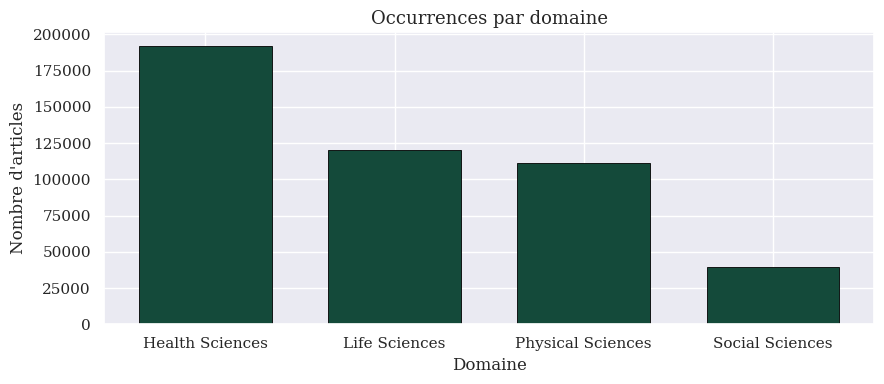

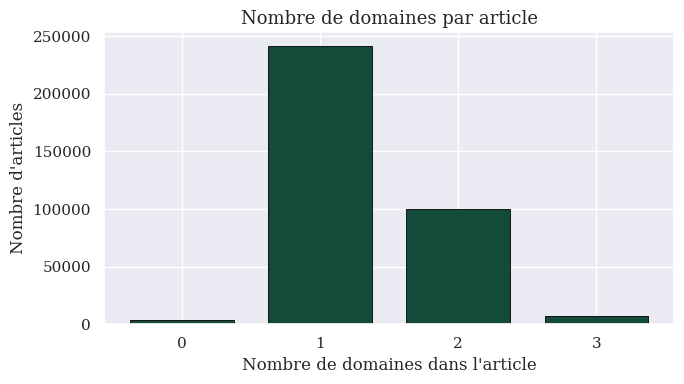

In [13]:
plot_domains_occurrences(df)
plot_domains_count_per_article(df)

In [14]:
# FIELDS : occurrences par field_* (barres horizontales)

def plot_fields_occurrences(df: pd.DataFrame):
    field_cols = [c for c in df.columns if c.startswith("field_") and c != "field_count"]
    if not field_cols:
        raise ValueError("Aucune colonne field_* trouvée dans le DataFrame.")

    data = pd.DataFrame({c: df[c] for c in field_cols})
    counts = data.sum(axis=0).sort_values(ascending=True)

    pretty_labels = (
        pd.Index(counts.index)
        .str.replace("^field_", "", regex=True)
        .str.replace("_", " ", regex=False)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )

    fig_h = max(6, 0.30 * len(counts))
    fig, ax = plt.subplots(figsize=(9, fig_h))

    ax.barh(pretty_labels, counts.values, edgecolor="black", linewidth=0.6, height=0.55)

    ax.set_title("Occurrences par champs", fontsize=13)
    ax.set_xlabel("Nombre d'articles")
    ax.set_ylabel("Champs")
    ax.grid(axis="x", alpha=0.25)

    plt.tight_layout()
    plt.show()


# 4) FIELDS : distribution du nombre de fields par article

def plot_fields_count_per_article(df: pd.DataFrame):
    field_cols = [c for c in df.columns if c.startswith("field_") and c != "field_count"]
    if not field_cols:
        raise ValueError("Aucune colonne field_* trouvée dans le DataFrame.")

    data = pd.DataFrame({c: df[c] for c in field_cols})
    field_count = data.sum(axis=1).astype(int)

    # Count plot
    counts = field_count.value_counts().sort_index()

    
    fig, ax = plt.subplots(figsize=(9, 4))
    ax.bar(
        counts.index.astype(int),
        counts.values,
        edgecolor="black",
        linewidth=0.6,
        width=0.95
    )

    ax.set_title("Nombre de champs par article", fontsize=13)
    ax.set_xlabel("Nombre de champs")
    ax.set_ylabel("Nombre d'articles")
    ax.set_xticks(counts.index.astype(int))
    plt.tight_layout()
    plt.show()

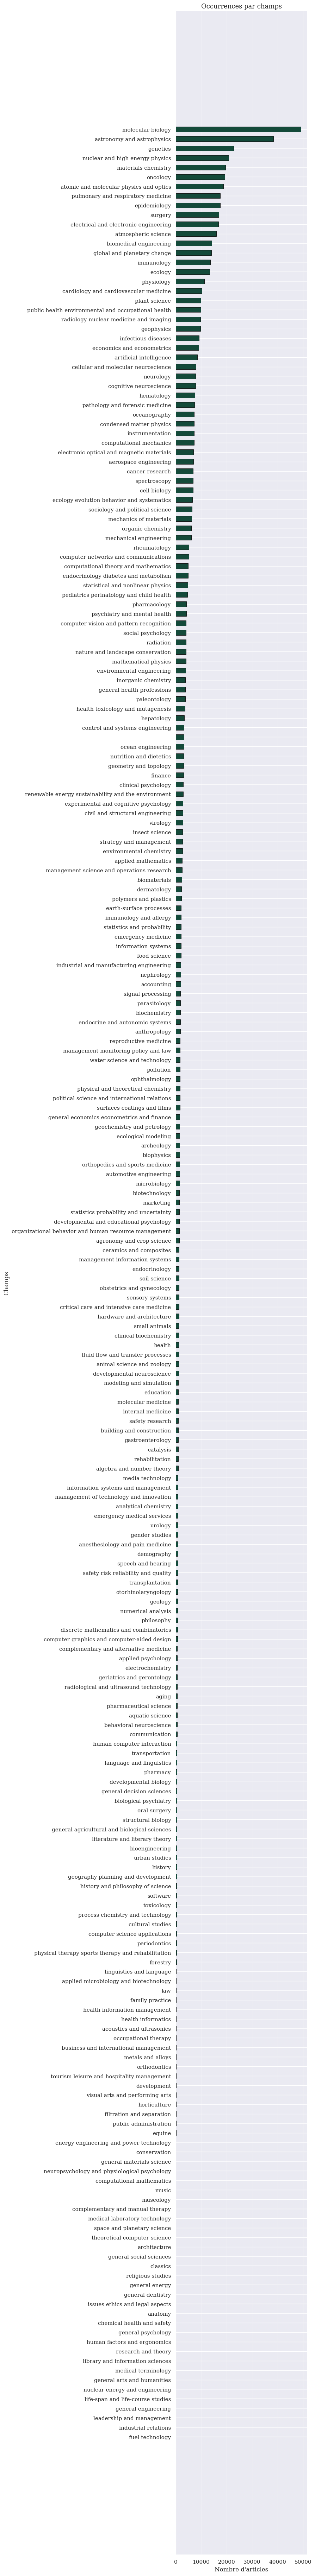

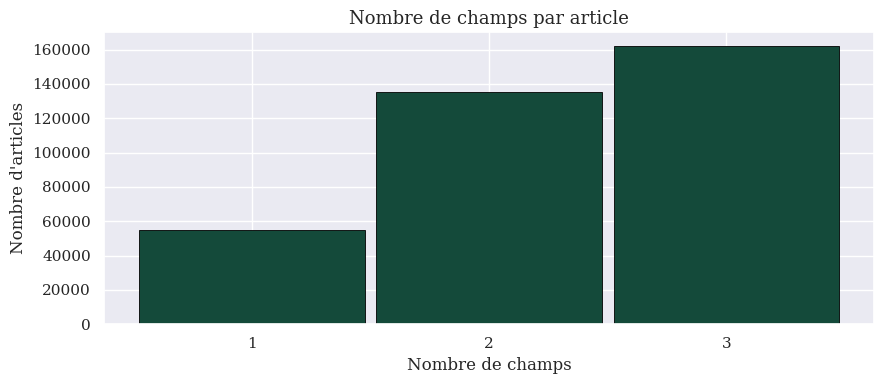

In [15]:
plot_fields_occurrences(df)
plot_fields_count_per_article(df)

## Analyse des données

In [16]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency, spearmanr, linregress
import patsy

In [17]:
df["publication_year"] = pd.to_datetime(df["publication_year"], errors="coerce")
df["year"] = df["publication_year"].dt.year
df = df.dropna(subset=["year"])
df["year"] = df["year"].astype(int)

C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\4083483079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df["year"].astype(int)


In [18]:
# Centrer les années
df['year'] = df['year'] - df['year'].min()

C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\2156765383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'] - df['year'].min()


### H1 & H2 : Domaine et année

In [19]:
ai_fields = [
    'field_artificial_intelligence',
    'field_computer_vision_and_pattern_recognition',
    'field_theoretical_computer_science'
]


biotech_fields = [
    'field_applied_microbiology_and_biotechnology',
    'field_bioengineering',
    'field_biomaterials',
    'field_biomedical_engineering',
    'field_biotechnology',
    'field_molecular_medicine'
]


fundamental_physics_fields = [
    'field_astronomy_and_astrophysics',
    'field_atomic_and_molecular_physics_and_optics',
    'field_condensed_matter_physics',
    'field_mathematical_physics',
    'field_nuclear_and_high_energy_physics',
    'field_space_and_planetary_science',
    'field_statistical_and_nonlinear_physics'
]


environmental_sciences_fields = [
    'field_ecological_modeling',
    'field_ecology',
    'field_ecology_evolution_behavior_and_systematics',
    'field_energy_engineering_and_power_technology',
    'field_environmental_chemistry',
    'field_environmental_engineering',
    'field_global_and_planetary_change',
    'field_nature_and_landscape_conservation',
    'field_pollution',
    'field_renewable_energy_sustainability_and_the_environment',
    'field_water_science_and_technology'
]


interdisciplinary_fields = [
    'field_health_informatics',
    'field_human-computer_interaction',
    'field_management_of_technology_and_innovation'
]




lists_to_plot = {
    "AI & Computer Science": ai_fields,
    "Biotechnologies": biotech_fields,
    "Fundamental Physics": fundamental_physics_fields,
    "Environmental Sciences": environmental_sciences_fields,
    "Interdisciplinary approach to technology": interdisciplinary_fields
}


In [20]:
# Dictionnaire des big fields
big_fields = {
    "ai": ai_fields,
    "biotech": biotech_fields,
    "physics": fundamental_physics_fields,
    "environment": environmental_sciences_fields,
    "interdisciplinary": interdisciplinary_fields
}

# Initialisation
for bf in big_fields:
    df[f'field_{bf}'] = 0

# Attribution : un article appartient à un big field s'il a au moins un field fin = 1
for bf, fields_list in big_fields.items():
    df[f'field_{bf}'] = df[fields_list].max(axis=1)

# Champ "reste"
df['field_other'] = 1 - df[[f'field_{bf}' for bf in big_fields]].max(axis=1)

C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\1842500676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'field_{bf}'] = 0
C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\1842500676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'field_{bf}'] = 0
C:\Users\elsab\AppData\Local\Temp\ipykernel_38440\1842500676.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [21]:
# Sélection des variables utiles
df_reg = df[
    [
        'funders_count',
        'funders_bin',
        'year',
        'field_ai',
        'field_biotech',
        'field_physics',
        'field_environment',
        'field_interdisciplinary',
        'field_other'
    ]
].dropna()

In [22]:
# Régression LOGISTIQUE avec interactions année × field
model = smf.logit(
    formula="""
    funders_bin ~ year
    + field_ai + field_biotech + field_physics
    + field_environment + field_interdisciplinary
    + year:field_ai
    + year:field_biotech
    + year:field_physics
    + year:field_environment
    + year:field_interdisciplinary
    """,
    data=df_reg
)

result = model.fit()
display(result.summary())

Optimization terminated successfully.
         Current function value: 0.577717
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            funders_bin   No. Observations:               351722
Model:                          Logit   Df Residuals:                   351710
Method:                           MLE   Df Model:                           11
Date:                Sun, 11 Jan 2026   Pseudo R-squ.:                 0.05934
Time:                        23:12:38   Log-Likelihood:            -2.0320e+05
converged:                       True   LL-Null:                   -2.1601e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.2336      0.016   -140.013      0.000      -2.265      -2.202
year                             0.0536      0.001     90.148      0.000       0.052       0.055
field_ai                        -0.4248      0.075     -5.661      0.000      -0.572      -0.278
field_biotech                    0.1401      0.054      2.618      0.009       0.035       0.245
field_physics                   -0.9633      0.033    -29.134      0.000      -1.028      -0.898
field_environment                0.3032      0.041      7.379      0.000       0.223       0.384
field_interdisciplinary         -0.5045      0.272     -1.853      0.064      -1.038       0.029
year:field_ai                    0.0083      0.003      2.976      0.003       0.003       0.014
year:field_biotech               0.0094      0.002      4.606      0.000       0.005       0.013
year:field_physics               0.0438      0.001     34.929      0.000       0.041       0.046
year:field_environment           0.0099      0.002      6.491      0.000       0.007       0.013
year:field_interdisciplinary    -0.0169      0.009     -1.780      0.075      -0.035       0.002
================================================================================================
"""

### H5 : FWCI 

In [23]:
# Nettoyage des données
df_clean = df[['fwci', 'funders_count', 'year']].dropna()

# Ajout d'une constante
df_clean = sm.add_constant(df_clean)

# Ajustement du modèle
X = df_clean[['const', 'funders_count', 'year']]
y = df_clean['fwci']

model = sm.OLS(y, X)
result = model.fit()

# Affichage des résultats
display(result.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   fwci   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     239.1
Date:                Sun, 11 Jan 2026   Prob (F-statistic):          1.70e-104
Time:                        23:12:38   Log-Likelihood:            -1.8115e+06
No. Observations:              351458   AIC:                         3.623e+06
Df Residuals:                  351455   BIC:                         3.623e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8327      0.196     14.464      0.000       2.449       3.217
funders_count     0.1593      0.022      7.085      0.000       0.115       0.203
year              0.1537      0.008     19.488      0.000       0.138       0.169
==============================================================================
Omnibus:                  1607233.818   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   17936684760882.879
Skew:                         158.614   Prob(JB):                         0.00
Kurtosis:                   34999.302   Cond. No.                         69.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### H6 : augmentation du nombre d'institution de financement par année

In [24]:
# Fonction pour extraire les institutions distinctes d'une ligne
def extract_institutions(funders_str):
    if pd.isna(funders_str):
        return []
    institutions = funders_str.split('|')
    return [inst.strip() for inst in institutions if inst.strip()]

# Créer une liste de toutes les institutions par année
institutions_by_year = {}
for _, row in df.iterrows():
    year = row['year']
    funders_str = row['funders.display_name']
    institutions = extract_institutions(funders_str)

    if year not in institutions_by_year:
        institutions_by_year[year] = set()

    for inst in institutions:
        institutions_by_year[year].add(inst)

# Calculer le nombre d'institutions distinctes par année
diversity_by_year = {year: len(institutions) for year, institutions in institutions_by_year.items()}
diversity_df = pd.DataFrame(list(diversity_by_year.items()), columns=['year', 'unique_institutions_count'])

# Trier par année
diversity_df = diversity_df.sort_values('year')

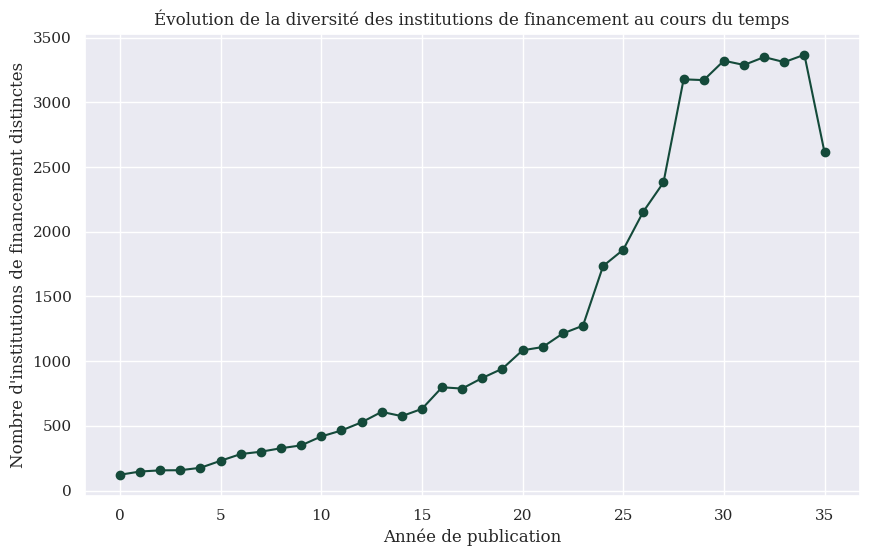

In [25]:
# Visualiser la tendance
plt.figure(figsize=(10, 6))
plt.plot(diversity_df['year'], diversity_df['unique_institutions_count'], marker='o')
plt.xlabel('Année de publication')
plt.ylabel('Nombre d\'institutions de financement distinctes')
plt.title('Évolution de la diversité des institutions de financement au cours du temps')
plt.grid(True)
plt.show()

In [26]:
# Préparer les données pour la régression
X = sm.add_constant(diversity_df['year'])
y = diversity_df['unique_institutions_count']

# Ajuster le modèle de régression linéaire
model = sm.OLS(y, X)
result = model.fit()

# Afficher les résultats
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     unique_institutions_count   R-squared:                       0.862
Model:                                   OLS   Adj. R-squared:                  0.858
Method:                        Least Squares   F-statistic:                     212.8
Date:                       Sun, 11 Jan 2026   Prob (F-statistic):           3.38e-16
Time:                               23:12:56   Log-Likelihood:                -269.18
No. Observations:                         36   AIC:                             542.4
Df Residuals:                             34   BIC:                             545.5
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -488.9489    143.690     -3.403      0.002    -780.962    -196.936
year         102.9955      7.061     14.587      0.000      88.647     117.344
==============================================================================
Omnibus:                        9.241   Durbin-Watson:                   0.238
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                2.762
Skew:                           0.259   Prob(JB):                        0.251
Kurtosis:                       1.746   Cond. No.                         39.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
df_pp = pd.read_csv("institutions_publics_privees.csv")

In [28]:
import pandas as pd

# 1. Préparation des données
# Ajouter une colonne 'original_index' pour conserver l'index de chaque article
df = df.reset_index().rename(columns={'index': 'original_index'})

# Séparer les noms des financeurs
df['funders.display_name'] = df['funders.display_name'].fillna('').str.split('|')
df = df.explode('funders.display_name')
df['funders.display_name'] = df['funders.display_name'].str.strip().str.lower()
df = df[df['funders.display_name'] != '']

# Nettoyer df_pp
df_pp['institution_name'] = df_pp['institution_name'].str.strip().str.lower()

# 2. Fusion avec df_pp
df_enrichi = pd.merge(
    df,
    df_pp,
    how='left',
    left_on='funders.display_name',
    right_on='institution_name',
    indicator=True
)

# 3. Filtrer pour ne garder que les correspondances réussies
df_enrichi = df_enrichi[df_enrichi['_merge'] == 'both']

# 4. Agrégation par article original
df_agg = df_enrichi.groupby('original_index').agg({
    'pays': lambda x: '|'.join(x.dropna().unique()),
    'type_financement': lambda x: '|'.join(x.dropna().astype(int).astype(str).unique())
}).reset_index()

# 5. Réintégrer les colonnes dans df
df = df.drop(columns=['nationalites_financeurs', 'types_financement'], errors='ignore')
df = df.merge(df_agg, on='original_index', how='left')

# Renommer les colonnes
df = df.rename(columns={'pays': 'nationalites_financeurs', 'type_financement': 'types_financement'})

# Supprimer les doublons de lignes (car on a explosé les financeurs)
df = df.drop_duplicates(subset='original_index').set_index('original_index')

# Afficher le résultat
df


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,id,doi,title,publication_year,language,type,countries_distinct_count,institutions_distinct_count,fwci,primary_location.source.display_name,primary_location.source.type,primary_topic.display_name,primary_topic.subfield.display_name,primary_topic.field.display_name,primary_topic.domain.display_name,authorships.author_position,authorships.institutions,authorships.countries,authorships.author.display_name,authorships.raw_affiliation_strings,topics.display_name,topics.subfield.display_name,topics.domain.display_name,keywords.display_name,funders.id,funders.display_name,funders_count,funders_bin,domain_health_sciences,domain_life_sciences,domain_physical_sciences,domain_social_sciences,field_,field_accounting,field_acoustics_and_ultrasonics,field_aerospace_engineering,field_aging,field_agronomy_and_crop_science,field_algebra_and_number_theory,field_analytical_chemistry,field_anatomy,field_anesthesiology_and_pain_medicine,field_animal_science_and_zoology,field_anthropology,field_applied_mathematics,field_applied_microbiology_and_biotechnology,field_applied_psychology,field_aquatic_science,field_archeology,field_architecture,field_artificial_intelligence,field_astronomy_and_astrophysics,field_atmospheric_science,field_atomic_and_molecular_physics_and_optics,field_automotive_engineering,field_behavioral_neuroscience,field_biochemistry,field_bioengineering,field_biological_psychiatry,field_biomaterials,field_biomedical_engineering,field_biophysics,field_biotechnology,field_building_and_construction,field_business_and_international_management,field_cancer_research,field_cardiology_and_cardiovascular_medicine,field_catalysis,field_cell_biology,field_cellular_and_molecular_neuroscience,field_ceramics_and_composites,field_chemical_health_and_safety,field_civil_and_structural_engineering,field_classics,field_clinical_biochemistry,field_clinical_psychology,field_cognitive_neuroscience,field_communication,field_complementary_and_manual_therapy,field_complementary_and_alternative_medicine,field_computational_mathematics,field_computational_mechanics,field_computational_theory_and_mathematics,field_computer_graphics_and_computer-aided_design,field_computer_networks_and_communications,field_computer_science_applications,field_computer_vision_and_pattern_recognition,field_condensed_matter_physics,field_conservation,field_control_and_systems_engineering,field_critical_care_and_intensive_care_medicine,field_cultural_studies,field_demography,field_dermatology,field_development,field_developmental_biology,field_developmental_neuroscience,field_developmental_and_educational_psychology,field_discrete_mathematics_and_combinatorics,field_earth-surface_processes,field_ecological_modeling,field_ecology,field_ecology_evolution_behavior_and_systematics,field_economics_and_econometrics,field_education,field_electrical_and_electronic_engineering,field_electrochemistry,field_electronic_optical_and_magnetic_materials,field_emergency_medical_services,field_emergency_medicine,field_endocrine_and_autonomic_systems,field_endocrinology,field_endocrinology_diabetes_and_metabolism,field_energy_engineering_and_power_technology,field_environmental_chemistry,field_environmental_engineering,field_epidemiology,field_equine,field_experimental_and_cognitive_psychology,field_family_practice,field_filtration_and_separation,field_finance,field_fluid_flow_and_transfer_processes,field_food_science,field_forestry,field_fuel_technology,field_gastroenterology,field_gender_studies,field_general_agricultural_and_biological_sciences,field_general_arts_and_humanities,field_general_decision_sciences,field_general_dentistry,field_general_economics_econometrics_and_finance,field_general_energy,field_general_engineering,field_general_health_professions,field_general_materials_science,field_general_psychology,field_general_social_sciences,field_genetics,field_geochemistry_and_petrology,field_geography_planning_and_development,field_geology,field_geometry_a

### H3 : évolution financement public et privé avec les années

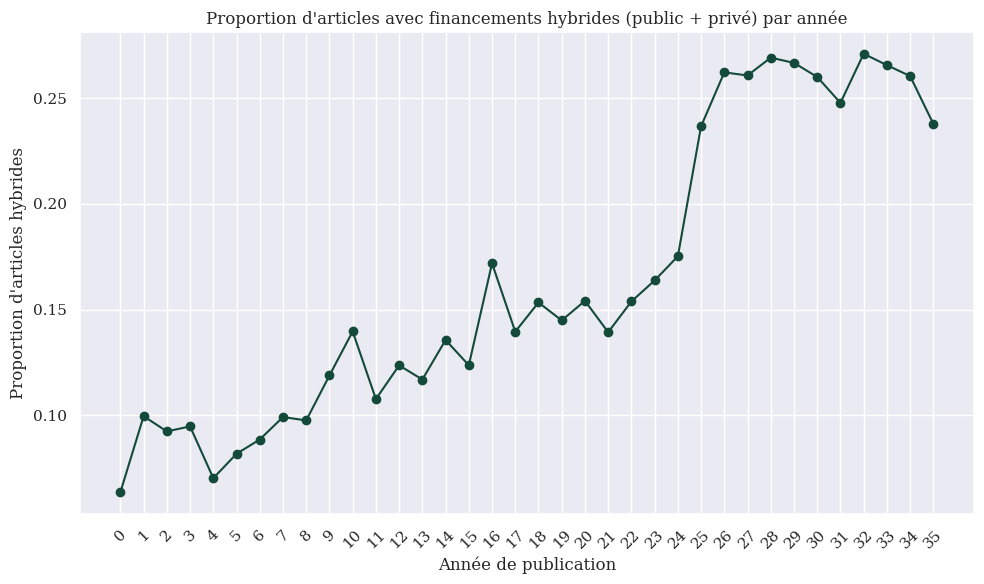

   year  proportion_hybride  nombre_articles
0     0            0.063636              220
1     1            0.099567              231
2     2            0.092369              249
3     3            0.094737              285
4     4            0.070234              299


In [29]:
# Un article est hybride s'il a à la fois 0 et 1, ou 2 dans 'types_financement'
df['est_hybride'] = df['types_financement'].str.contains('2') | (df['types_financement'].str.contains('0') & df['types_financement'].str.contains('1'))


# Calculer la proportion d'articles hybrides par année
proportion_hybride_par_annee = (
    df.groupby('year')['est_hybride']
    .agg(['mean', 'size'])
    .rename(columns={'mean': 'proportion_hybride', 'size': 'nombre_articles'})
    .reset_index()
)

# Visualiser la tendance
plt.figure(figsize=(10, 6))
plt.plot(
    proportion_hybride_par_annee['year'],
    proportion_hybride_par_annee['proportion_hybride'],
    marker='o',
    linestyle='-'
)
plt.title("Proportion d'articles avec financements hybrides (public + privé) par année")
plt.xlabel("Année de publication")
plt.ylabel("Proportion d'articles hybrides")
plt.grid(True)
plt.xticks(proportion_hybride_par_annee['year'], rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()

# Afficher les données sous-jacentes
print(proportion_hybride_par_annee.head())


In [30]:
X = df[['year']]
X = sm.add_constant(X)  # Ajoute une constante pour l'interception
y = df['est_hybride']

# Régression logistique
model = sm.Logit(y, X).fit()

# Afficher les résultats
display(model.summary())


Optimization terminated successfully.
         Current function value: 0.528719
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            est_hybride   No. Observations:               106900
Model:                          Logit   Df Residuals:                   106898
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Jan 2026   Pseudo R-squ.:                 0.01415
Time:                        23:13:40   Log-Likelihood:                -56520.
converged:                       True   LL-Null:                       -57331.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4395      0.033    -72.826      0.000      -2.505      -2.374
year           0.0447      0.001     38.074      0.000       0.042       0.047
==============================================================================
"""

### H4 : part des financements privées augmente + financement public stable

In [31]:
# 1. Créer des colonnes indicatrices pour chaque type de financement
df['a_financement_prive'] = df['types_financement'].str.contains('1')
df['a_financement_public'] = df['types_financement'].str.contains('0')

df['a_financement_prive'] = pd.to_numeric(df['a_financement_prive'], errors='coerce')
df['a_financement_public'] = pd.to_numeric(df['a_financement_public'], errors='coerce')

In [32]:
# Calculer la proportion par année
proportions_par_annee = (
    df.groupby('year')
    .agg({
        'a_financement_prive': 'mean',  # Moyenne = proportion
        'a_financement_public': 'mean',
        'year': 'size'  # Nombre d'articles par année
    })
    .rename(columns={
        'a_financement_prive': 'proportion_prive',
        'a_financement_public': 'proportion_public',
        'year': 'nombre_articles'
    })
    .reset_index()
)


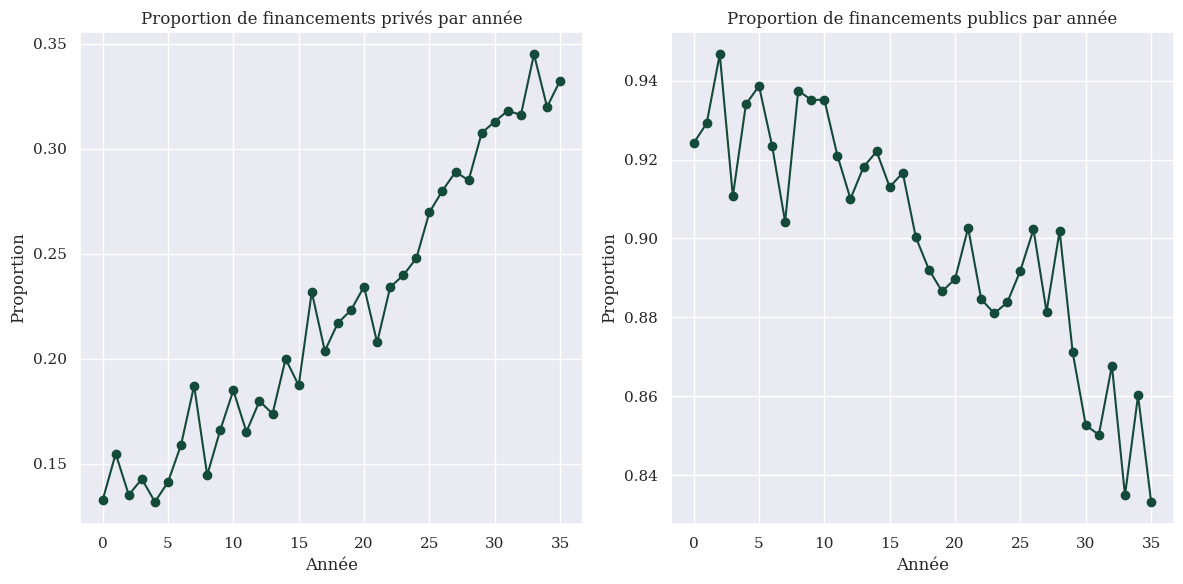

In [33]:
plt.figure(figsize=(12, 6))

# Proportion de financements privés
plt.subplot(1, 2, 1)
plt.plot(
    proportions_par_annee['year'],
    proportions_par_annee['proportion_prive'],
    marker='o',
    linestyle='-',
)
plt.title("Proportion de financements privés par année")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.grid(True)

# Proportion de financements publics
plt.subplot(1, 2, 2)
plt.plot(
    proportions_par_annee['year'],
    proportions_par_annee['proportion_public'],
    marker='o',
    linestyle='-',
)
plt.title("Proportion de financements publics par année")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.grid(True)

plt.tight_layout()
plt.show()


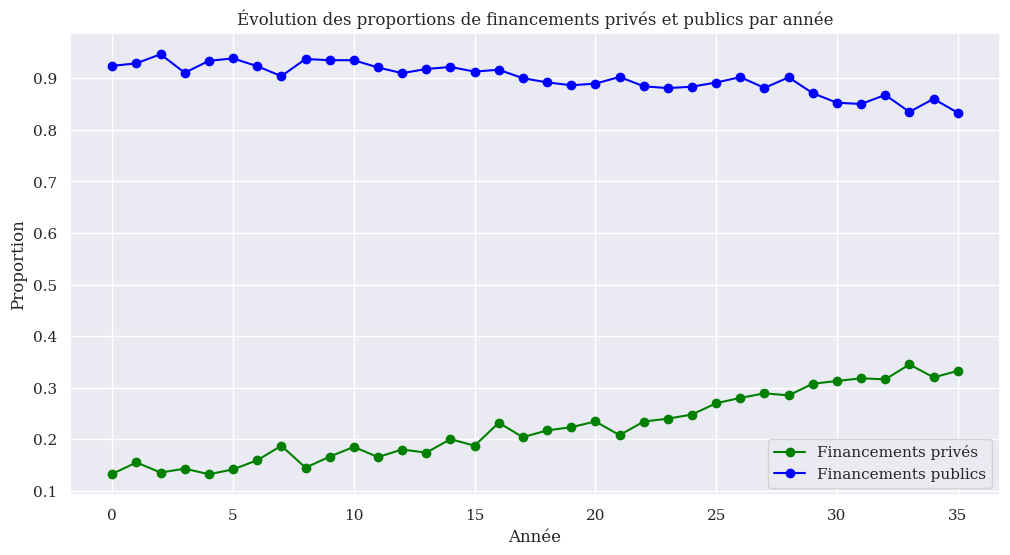

In [34]:
plt.figure(figsize=(12, 6))

# Tracer la courbe des financements privés
plt.plot(
    proportions_par_annee['year'],
    proportions_par_annee['proportion_prive'],
    marker='o',
    linestyle='-',
    color='green',
    label='Financements privés'
)

# Tracer la courbe des financements publics
plt.plot(
    proportions_par_annee['year'],
    proportions_par_annee['proportion_public'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Financements publics'
)

# Ajouter les labels et la légende
plt.title("Évolution des proportions de financements privés et publics par année")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


### H7 : pays occidentaux s'effacent au profit des pays asiatiques

In [35]:
western_countries = [
    'France', 'Germany', 'United States', 'United Kingdom', 'Canada', 'Australia',
    'Spain', 'Italy', 'Netherlands', 'Belgium', 'Switzerland', 'Sweden', 'Norway',
    'Denmark', 'Finland', 'Austria', 'Ireland', 'Portugal', 'Greece', 'Iceland'
]

asian_countries = [
    'China', 'Japan', 'South Korea', 'India', 'Singapore', 'Taiwan', 'Hong Kong',
    'Malaysia', 'Thailand', 'Indonesia', 'Vietnam', 'Philippines'
]


In [36]:
def classify_funding(nationalities):
    if pd.isna(nationalities) or nationalities == '':
        return 'Unknown'

    countries = nationalities.split('|')
    categories = set()

    for country in countries:
        country = country.strip()
        if country in western_countries:
            categories.add('Western')
        elif country in asian_countries:
            categories.add('Asian')
        else:
            categories.add('Other')

    # Priorité : Western > Asian > Other
    if 'Western' in categories:
        return 'Western'
    elif 'Asian' in categories:
        return 'Asian'
    else:
        return 'Other'

In [37]:
# Appliquer la fonction de classification
df['funding_origin'] = df['nationalites_financeurs'].apply(classify_funding)

# Compter les occurrences par année et par catégorie
funding_by_year = (
    df.groupby(['year', 'funding_origin'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Calculer les proportions
funding_by_year['total'] = funding_by_year.sum(axis=1)
funding_by_year['prop_Western'] = funding_by_year['Western'] / funding_by_year['total']
funding_by_year['prop_Asian'] = funding_by_year['Asian'] / funding_by_year['total']
funding_by_year['prop_Other'] = funding_by_year['Other'] / funding_by_year['total']

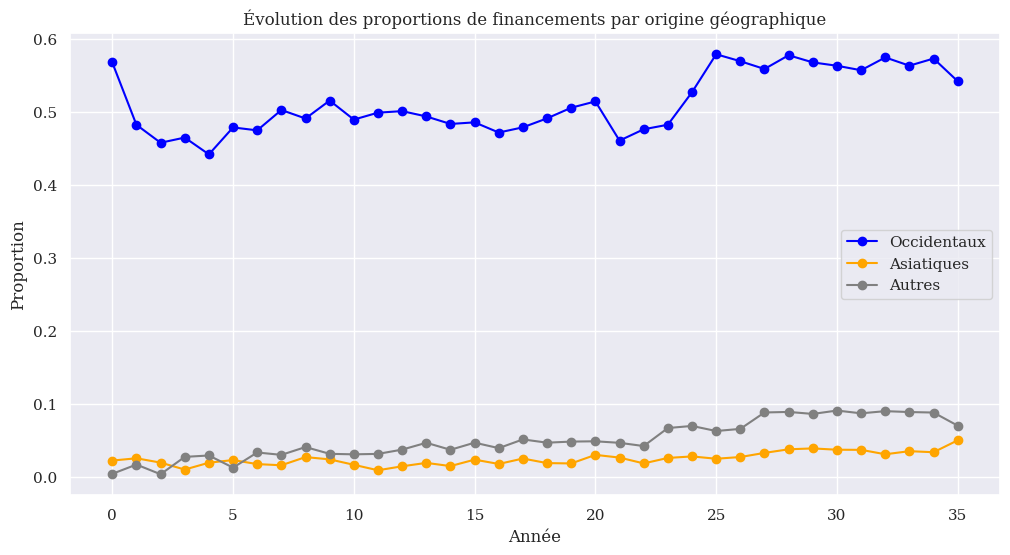

In [38]:
plt.figure(figsize=(12, 6))

# Tracer les courbes
plt.plot(
    funding_by_year['year'],
    funding_by_year['prop_Western'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Occidentaux'
)
plt.plot(
    funding_by_year['year'],
    funding_by_year['prop_Asian'],
    marker='o',
    linestyle='-',
    color='orange',
    label='Asiatiques'
)
plt.plot(
    funding_by_year['year'],
    funding_by_year['prop_Other'],
    marker='o',
    linestyle='-',
    color='gray',
    label='Autres'
)

# Ajouter les labels et la légende
plt.title("Évolution des proportions de financements par origine géographique")
plt.xlabel("Année")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

In [39]:
from scipy.stats import kendalltau

# Test pour les financements occidentaux
tau_western, p_western = kendalltau(
    funding_by_year['year'],
    funding_by_year['prop_Western']
)
print(f"Financements occidentaux - Test de Mann-Kendall : tau = {tau_western:.3f}, p = {p_western:.4f}")
if p_western < 0.05:
    print("→ Tendance significative (diminution si tau < 0).")
else:
    print("→ Pas de tendance significative.")

# Test pour les financements asiatiques
tau_asian, p_asian = kendalltau(
    funding_by_year['year'],
    funding_by_year['prop_Asian']
)
print(f"\nFinancements asiatiques - Test de Mann-Kendall : tau = {tau_asian:.3f}, p = {p_asian:.4f}")
if p_asian < 0.05:
    print("→ Tendance significative (augmentation si tau > 0).")
else:
    print("→ Pas de tendance significative.")


Financements occidentaux - Test de Mann-Kendall : tau = 0.448, p = 0.0001
→ Tendance significative (diminution si tau < 0).

Financements asiatiques - Test de Mann-Kendall : tau = 0.521, p = 0.0000
→ Tendance significative (augmentation si tau > 0).


In [40]:
corr, p_corr = kendalltau(
    funding_by_year['prop_Western'],
    funding_by_year['prop_Asian']
)
print(f"\nCorrélation entre financements occidentaux et asiatiques : tau = {corr:.3f}, p = {p_corr:.4f}")
if p_corr < 0.05:
    print("→ Corrélation significative (négative si tau < 0).")
else:
    print("→ Pas de corrélation significative.")



Corrélation entre financements occidentaux et asiatiques : tau = 0.400, p = 0.0006
→ Corrélation significative (négative si tau < 0).
